Data Set - http://www.stat.ufl.edu/~winner/data/airq402.dat

Data Description - http://www.stat.ufl.edu/~winner/data/airq402.txt

### 1. Import and store the data in a data frame. (3 points)

In [1]:
### Import functions to read file
import numpy as np
import pandas as pd
import urllib.request
import shutil

# Download the file from `url` and save it locally under `file_name`:
url = 'http://www.stat.ufl.edu/~winner/data/airq402.dat'
file_name = 'airlinedata.txt'
with urllib.request.urlopen(url) as response, open(file_name, 'wb') as out_file:
    shutil.copyfileobj(response, out_file)
    
mylist = []
a_file = open('airlinedata.txt')
data = a_file.readlines()
for a_line in data:  
    city1 = a_line[:3].strip()
    city2 = a_line[4:7].strip()
    avgfare = a_line[11:17].strip()
    distance = a_line[20:23].strip()
    avgwkpass = a_line[26:33].strip()
    mktleadairline = a_line[35:37].strip()
    mktshare = a_line[40:45].strip()
    avgfare2 = a_line[48:54].strip()
    lowprcairline = a_line[56:58].strip()
    mktshare2 = a_line[61:66].strip()
    price = a_line[69:75].strip()
    temp = [city1,city2,avgfare,distance,avgwkpass,mktleadairline,mktshare,avgfare2,lowprcairline,mktshare2,price]
    mylist.append(temp)

airlinedata = pd.DataFrame(mylist,columns = ['city1','city2','avgfare','distance','avgwkpass','mktleadairline','mktshare','avgfare2','lowprcairline','mktshare2','price'] )

### 2. Remove the outliers from the data (5 points)

In [2]:
### Convert dataframe column to numbers for outlier calculation
airlinedata[['avgfare','distance','avgwkpass','mktshare','avgfare2','mktshare2','price']] = airlinedata[['avgfare','distance','avgwkpass','mktshare','avgfare2','mktshare2','price']].astype(float)

In [3]:
### Check dtypes
airlinedata.dtypes

city1              object
city2              object
avgfare           float64
distance          float64
avgwkpass         float64
mktleadairline     object
mktshare          float64
avgfare2          float64
lowprcairline      object
mktshare2         float64
price             float64
dtype: object

In [4]:
### Create Function to identify outlier columns in almost 3 sigma range
def outliers(x): 
       return np.abs(x- x.median()) > 1.5*(x.quantile(.75)-x.quantile(0.25))

In [5]:
### Flag each column as in or outside
### 'avgfare','distance','avgwkpass','mktshare','avgfare2','mktshare2','price'
airlinedata['avgfare_f'] = outliers(airlinedata['avgfare'])
airlinedata['distance_f'] = outliers(airlinedata['distance'])
airlinedata['avgwkpass_f'] = outliers(airlinedata['avgwkpass'])
airlinedata['mktshare_f'] = outliers(airlinedata['mktshare'])
airlinedata['avgfare2_f'] = outliers(airlinedata['avgfare2'])
airlinedata['mktshare2_f'] = outliers(airlinedata['mktshare2'])
airlinedata['price_f'] = outliers(airlinedata['price'])

In [6]:
### Create Working Data Set for further computation
### Any cases which have the flag set as TRUE should be excluded
### Flags signify value outside 3 SIGMA
airlinedata_w = airlinedata[(airlinedata['avgfare_f'] != True) & (airlinedata['distance_f'] != True) & (airlinedata['avgwkpass_f'] != True) & (airlinedata['mktshare_f'] != True) & (airlinedata['avgfare2_f'] != True) & (airlinedata['mktshare2_f'] != True) & (airlinedata['price_f'] != True)][['city1','city2','avgfare','distance','avgwkpass','mktleadairline','mktshare','avgfare2','lowprcairline','mktshare2','price']]

### 3. Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable and split the table. (3 points)

In [7]:
airlinedata_f = airlinedata_w[['avgfare','distance','avgwkpass','mktshare','avgfare2','mktshare2','price']]

### 4. Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)

In [8]:
### Validate the corelation
airlinedata_f.corr()

,avgfare,distance,avgwkpass,mktshare,avgfare2,mktshare2,price
avgfare,1.000000,0.073044,-0.190653,-0.026626,0.975076,-0.436149,0.800522
distance,0.073044,1.000000,-0.023974,0.072258,0.080671,-0.041036,0.067409
avgwkpass,-0.190653,-0.023974,1.000000,0.019803,-0.165939,0.087425,-0.189478
mktshare,-0.026626,0.072258,0.019803,1.000000,-0.016590,-0.006426,-0.209392
avgfare2,0.975076,0.080671,-0.165939,-0.016590,1.000000,-0.478346,0.751418
mktshare2,-0.436149,-0.041036,0.087425,-0.006426,-0.478346,1.000000,-0.157354
price,0.800522,0.067409,-0.189478,-0.209392,0.751418,-0.157354,1.000000


In [9]:
### avgfare has negligible corelation (direct or inversely) with distance, mktshare
airlinedata_f.drop(['distance','mktshare'],axis=1,inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### 5. Create scatter Plot of Independent Variable vs Dependent Variable. (4 points)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


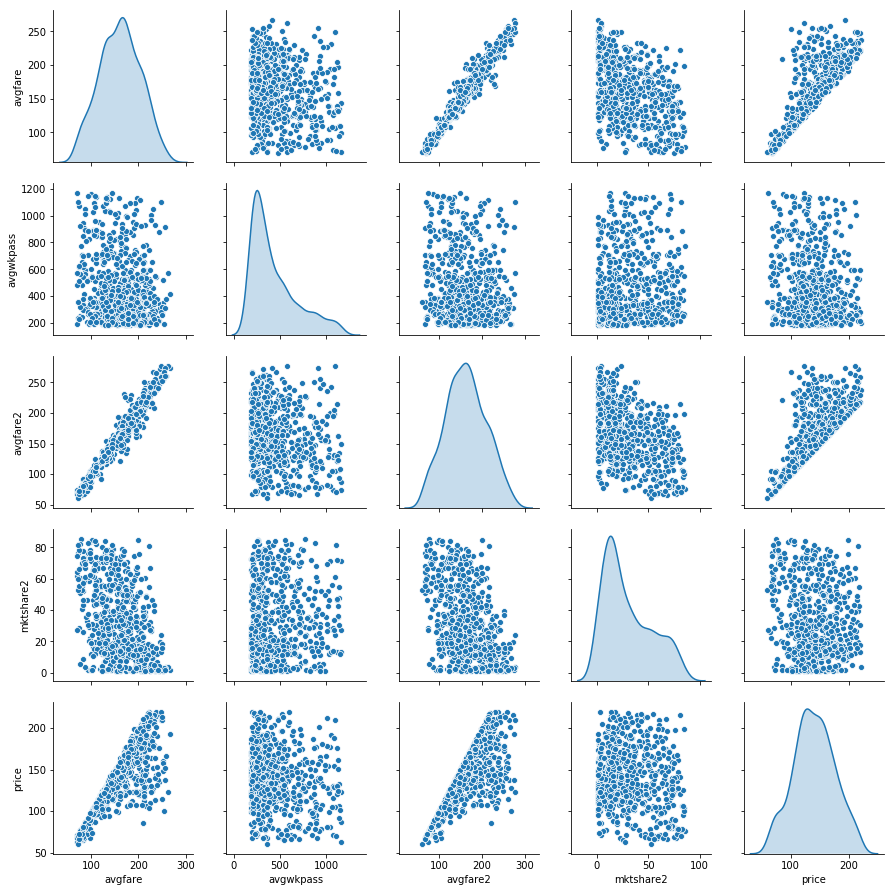

In [11]:
import seaborn as sns
sns.pairplot( airlinedata_f , diag_kind='kde')

### 6. Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points)

In [12]:
x = airlinedata_f[['avgwkpass','avgfare2','mktshare2','price']]
y = airlinedata_f['avgfare']

In [13]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=7)

In [14]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
linreg.score(x_train,y_train)

0.9651582870904155

In [16]:
linreg.score(x_test,y_test)

0.9483850645188564

### 7. Print the coefficients & intercepts of the linear regression model (5 points)

In [17]:
linreg.coef_

array([-0.0021615 ,  0.77173902, -0.00815757,  0.19440761])

In [18]:
linreg.intercept_

9.003855464201791